In [2]:
import pandas as pd
from prometheus_api_client import PrometheusConnect

# Connect to Prometheus running on localhost
prom = PrometheusConnect(url="http://localhost:9090")

# Query Prometheus for the desired metrics
query = "SYSACT__AVERAGE_CPU_RATE"
metrics = prom.custom_query(query)

# Convert the metrics to a Pandas DataFrame
df = pd.DataFrame(metrics)

# Print the DataFrame
df

,metric,value
0,"{'__name__': 'SYSACT__AVERAGE_CPU_RATE', 'driv...","[1679888365.708, 100]"
1,"{'__name__': 'SYSACT__AVERAGE_CPU_RATE', 'driv...","[1679888365.708, 66.66]"


In [49]:
import requests

# Define the Prometheus query and time range
query = "SYSACT__AVERAGE_CPU_RATE"
setp = '3h' # 3 hours

# Define the Prometheus server URL
url = "http://localhost:9090/api/v1/query"

# Define the request parameters
params = {
    "query": f'{query}[{setp}]'
}

response = requests.get(url, params=params)
data = response.json()["data"]["result"]
data



[{'metric': {'__name__': 'SYSACT__AVERAGE_CPU_RATE',
   'driver_class': 'com.ibm.as400.access.AS400JDBCDriver',
   'hostname': 'UT51P41',
   'instance': '9.5.55.23:9853',
   'job': 'prometheus'},
  'values': [[1679884542.148, '133.33'],
   [1679884602.15, '100'],
   [1679884662.151, '50'],
   [1679884722.151, '100'],
   [1679884782.15, '100'],
   [1679884842.152, '100'],
   [1679884902.151, '100'],
   [1679884962.151, '75'],
   [1679885022.151, '100'],
   [1679885082.151, '125'],
   [1679885142.148, '150'],
   [1679885202.151, '100'],
   [1679885262.148, '50'],
   [1679885322.15, '66.66'],
   [1679885382.151, '100'],
   [1679885442.151, '66.66'],
   [1679885502.151, '100'],
   [1679885562.151, '66.66'],
   [1679885622.15, '100'],
   [1679885682.148, '100'],
   [1679885742.151, '80'],
   [1679885802.151, '125'],
   [1679885862.148, '100'],
   [1679885922.151, '100'],
   [1679885982.148, '100'],
   [1679886042.148, '99.4'],
   [1679886102.151, '100'],
   [1679886162.151, '100'],
   [1679

90
91


<Axes: >

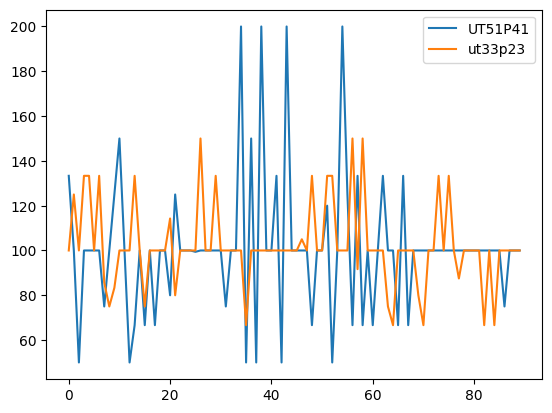

In [51]:
values = {}
for result in data:
    host = result["metric"]['hostname']
    values[host] = [float(k[1]) for k in result["values"]]
    print(len(values[host]))

# Calculate the minimum and maximum number of rows across all hosts
min_rows = min(len(v) for v in values.values())
max_rows = max(len(v) for v in values.values())

# Drop the last rows for each host if necessary to make them all the same length
if min_rows < max_rows:
    num_rows = min_rows
    for host, v in values.items():
        if len(v) > num_rows:
            values[host] = v[:num_rows]

# Create a DataFrame from the values dictionary
df = pd.DataFrame(values)

df.plot()

<Axes: xlabel='time'>

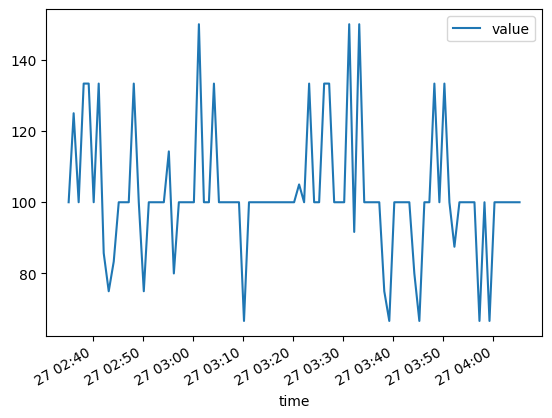

In [80]:
ut33p23 = data[1]['values']
cleaned = [[pd.Timestamp(v[0], unit='s'), float(v[1])] for v in ut33p23]
pd.DataFrame(cleaned, columns=['time', 'value']).plot(x='time', y='value')